# Happiness Prediction
- In this project, we will predict which countries or regions of the world will rise or fall in happiness based on factors such as GDP, freedom, and trust in government. We will use 
- How is this data collected? How is the happiness score calculated? 

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gp
from mpl_toolkits import mplot3d # for scatter plots
from mpl_toolkits.axes_grid1 import make_axes_locatable # for axes and legend alignment
%matplotlib inline

# EDA/Prep
- read in from 2015-2019
- put them all in the same dataframe with a year as a label 

In [108]:
df2015 = pd.read_csv('world_happiness/2015.csv')
df2016 = pd.read_csv('world_happiness/2016.csv')
df2017 = pd.read_csv('world_happiness/2017.csv')
df2018 = pd.read_csv('world_happiness/2018.csv')
df2019 = pd.read_csv('world_happiness/2019.csv')
df2020 = pd.read_csv('world_happiness/2020.csv')

## Rename/Relabel/Drop Columns
- country / region in 2015 and 2016 can be joined. 2017 has just country 
- 2015/2016 have similar formats
- <b>should check out 2020 report</b>

In [109]:
# to stay loyal to country or region, we only use region if there is no country provided 
# 2017 does not provide a region
print("Number of missing countries in 2015: ", df2015.Country.isna().sum())
print("Number of missing countries in 2016: ", df2016.Country.isna().sum())
df2015 = df2015.drop(columns=['Region'])
df2016 = df2016.drop(columns=['Region'])

Number of missing countries in 2015:  0
Number of missing countries in 2016:  0


In [110]:
# renaming stuff
df2015 = df2015.rename({'Happiness Rank': 'Overall rank', 'Happiness Score': 'Score',
                       'Economy (GDP per Capita)':'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 
                       'Trust (Government Corruption)' : 'Perceptions of corruption', 
                        'Country' : 'Country or region'}, axis='columns')
df2016 = df2016.rename({'Happiness Rank': 'Overall rank', 'Happiness Score': 'Score',
                       'Economy (GDP per Capita)':'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 
                       'Trust (Government Corruption)' : 'Perceptions of corruption', 
                       'Country' : 'Country or region'}, axis='columns')
df2017 = df2017.rename({'Happiness.Rank': 'Overall rank', 'Happiness.Score' : 'Score', 
                       'Economy..GDP.per.Capita.' : 'GDP per capita', 'Health..Life.Expectancy.' : 'Healthy life expectancy',
                       'Trust..Government.Corruption.': 'Perceptions of corruption', 
                       'Country' : 'Country or region'}, axis='columns')
df2018 = df2018.rename({'Freedom to make life choices': 'Freedom'}, axis='columns')
df2019 = df2019.rename({'Freedom to make life choices': 'Freedom'}, axis='columns')

### see if we can preserve the error metrics from 2015-2017
- <b>2015-2016</b>
    - Standard Error, Dystopia Residual, Lower Confidence Level
- <b>2017</b>
    - Whisker.high, Whisker.low, Dystopia.Residual

In [111]:
# dropping stuff 
df2015 = df2015.drop(columns=['Standard Error', 'Dystopia Residual'])
df2016 = df2016.drop(columns=['Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'])
df2017 = df2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'])

In [112]:
# check if they're all the same columns 
print("2015 columns: ", df2015.columns)
print("2016 columns: ", df2016.columns)
print("2017 columns: ", df2017.columns)
print("2018 columns: ", df2018.columns) # 2018, 2019 have the same column names
print("2019 columns: ", df2019.columns)

2015 columns:  Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Family', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
2016 columns:  Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Family', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
2017 columns:  Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Family', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2018 columns:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2019 columns:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy'

## Initial visualizations
- [Data Visualization: How To Plot A Map with Geopandas in Python?
](https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)
- <b>dependencies for [geopandas](https://geopandas.org/getting_started.html) library</b>
```
pip3 install shapely
brew install gdal (dependency for Fiona) 
pip3 install fiona 
pip3 install pyproj
pip3 install geopandas
```

In [134]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres')) # read in world df

# rename some df2020 names to match world df 
# for index in df2020.index:
#     if df2020.loc[index,'Country name']=='United States':
#         df2020.loc[index,'Country name'] = 'United States of America'
#     elif df2020.loc[index,'Country name']=='S Sudan':
#         df2020.loc[index,'Country name'] = 'Sudan'

In [114]:
# merge world and 2020 df scores 
df = pd.DataFrame({'name': df2020['Country name'], 'score': score_2020})
merge2020 = pd.merge(world, df, on='name', how='left')

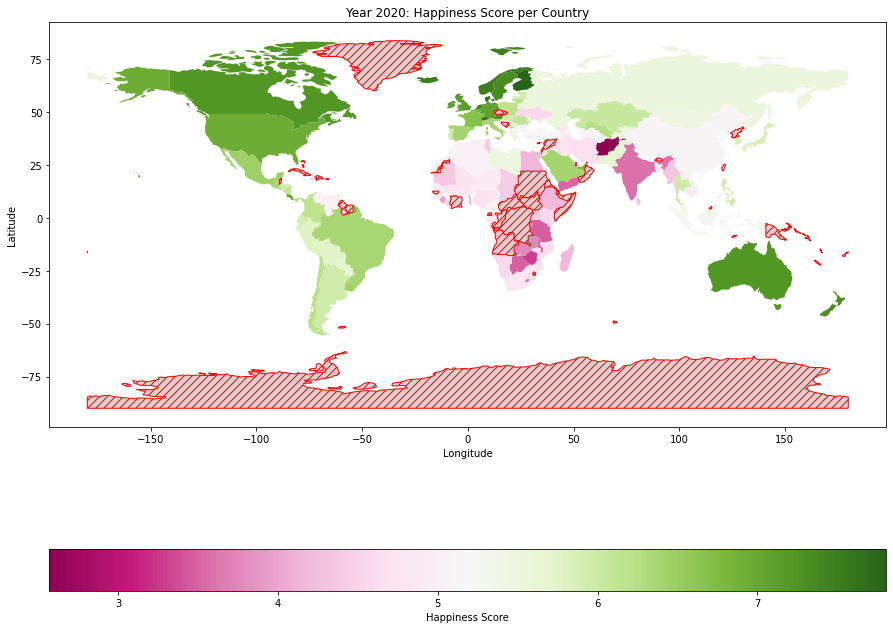

In [115]:
# plot the happiness score of each country on this map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 15)
merge2020.plot(column='score',legend=True, ax=ax,cmap='PiYG', legend_kwds={'label': "Happiness Score", 'orientation': "horizontal"},
missing_kwds={ "color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values", },)

plt.title('Year 2020: Happiness Score per Country', loc='center') # center title? 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Preprocessing 2020 Dataframe

In [116]:
# preprocess 2020 a little differently
# df2020.columns
df2020 = df2020.drop(columns=['Regional indicator',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'])
df2020

,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [117]:
df2020 = df2020.rename({'Country name' : 'Country or region', 'Ladder score' : 'Score', 
                                      'Explained by: Log GDP per capita': 'GDP per capita', 
                                      'Explained by: Social support' : 'Social support', 
                                      'Explained by: Healthy life expectancy' : 'Healthy life expectancy', 
                                      'Explained by: Freedom to make life choices': 'Freedom', 
                                      'Explained by: Generosity' : 'Generosity',
                                      'Explained by: Perceptions of corruption' : 'Perceptions of corruption'},
                                      axis='columns')

In [118]:
df2020.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [119]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
dfs = [df2015, df2016, df2017, df2018, df2019, df2020]
for i in range(len(dfs)):
    dfs[i].insert(loc=0, column='year', value=years[i])

In [120]:
# inner join them
df = pd.concat(dfs, join='inner')
df

,year,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
0,2015,Switzerland,7.5870,1.396510,0.941430,0.665570,0.419780,0.296780
1,2015,Iceland,7.5610,1.302320,0.947840,0.628770,0.141450,0.436300
2,2015,Denmark,7.5270,1.325480,0.874640,0.649380,0.483570,0.341390
3,2015,Norway,7.5220,1.459000,0.885210,0.669730,0.365030,0.346990
4,2015,Canada,7.4270,1.326290,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,3.4759,0.041072,0.000000,0.292814,0.028265,0.253513
149,2020,Rwanda,3.3123,0.343243,0.572383,0.604088,0.485542,0.235705
150,2020,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.080929,0.151349
151,2020,South Sudan,2.8166,0.289083,0.208809,0.065609,0.111157,0.209935


## Visualisations for 2015-2020 dataset
- [EDA and Model Prediction](https://www.kaggle.com/ezgitasci/eda-and-model-prediction)
- horizontal bar chart for happiest/least happy countries based on 2020
- collection of countries vs. feature in line chart
- corr heat map for 2015-2020
- individual countries and their features

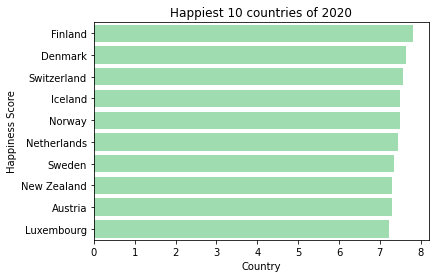

In [121]:
# horizontal bar charts to view top 10 happy countries vs. bottom 10 happy countries
# this could reveal some bias in the data
df_top = df2020.iloc[:10, :]
df_top
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab')
plt.title('Happiest 10 countries of 2020')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

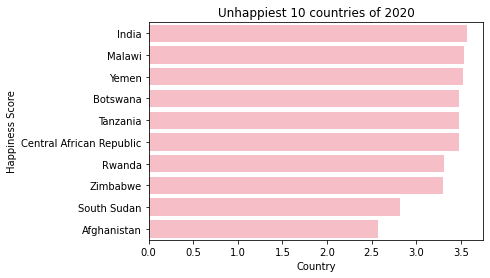

In [122]:
df_bot = df2020.iloc[-10:, :]
df_bot
sns.barplot(x=df_bot['Score'], y=df_bot['Country or region'], orient='h', color='#FFB6C1')
plt.title('Unhappiest 10 countries of 2020')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

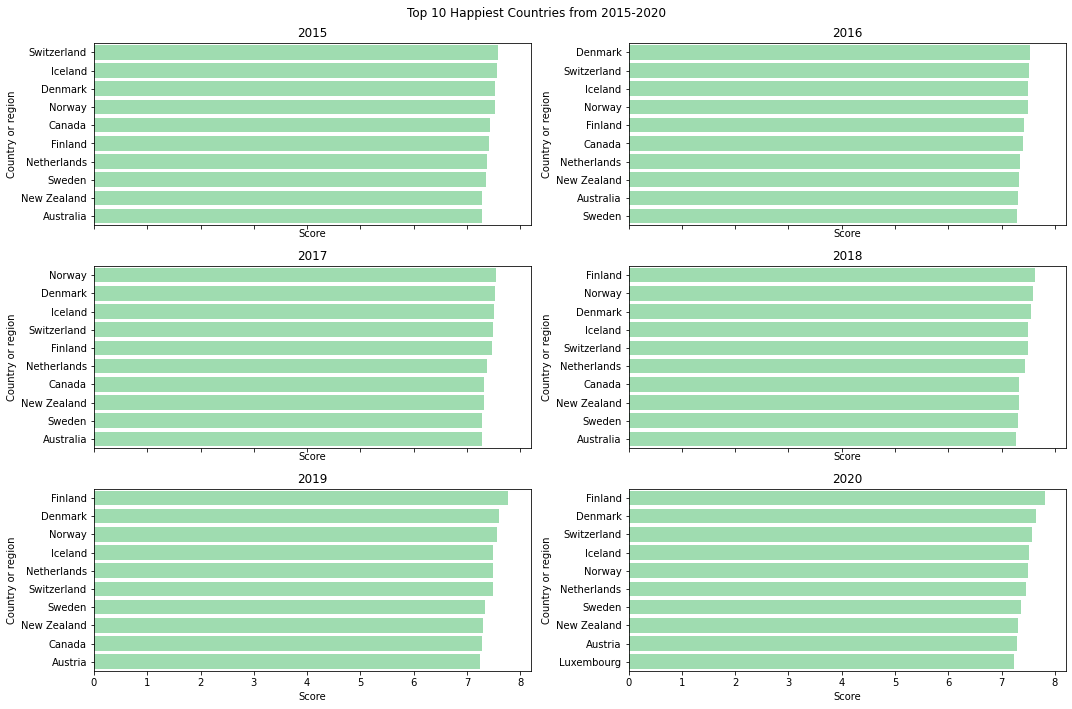

In [145]:
# some of the happiest countries over the year 
fig, axes = plt.subplots(3,2, figsize=(15,10), sharex=True)

df_top = df2015.iloc[:10, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab', ax=axes[0, 0])
axes[0,0].set_title('2015')

df_top = df2016.iloc[:10, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab', ax=axes[0, 1])
axes[0, 1].set_title('2016')

df_top = df2017.iloc[:10, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab', ax=axes[1, 0])
axes[1, 0].set_title('2017')

df_top = df2018.iloc[:10, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab', ax=axes[1, 1])
axes[1, 1].set_title('2018')

df_top = df2019.iloc[:10, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab', ax=axes[2, 0])
axes[2, 0].set_title('2019')

df_top = df2020.iloc[:10, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#95e6ab', ax=axes[2, 1])
axes[2, 1].set_title('2020')

fig.suptitle('Top 10 Happiest Countries from 2015-2020')
fig.tight_layout()
plt.show()

# we can see that Denmark, Switzerland, Iceland, Norway, Sweden, Netherlands are consistantly in the top 10
# save these countries
happiest_countries = ['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Sweden', 'Netherlands']

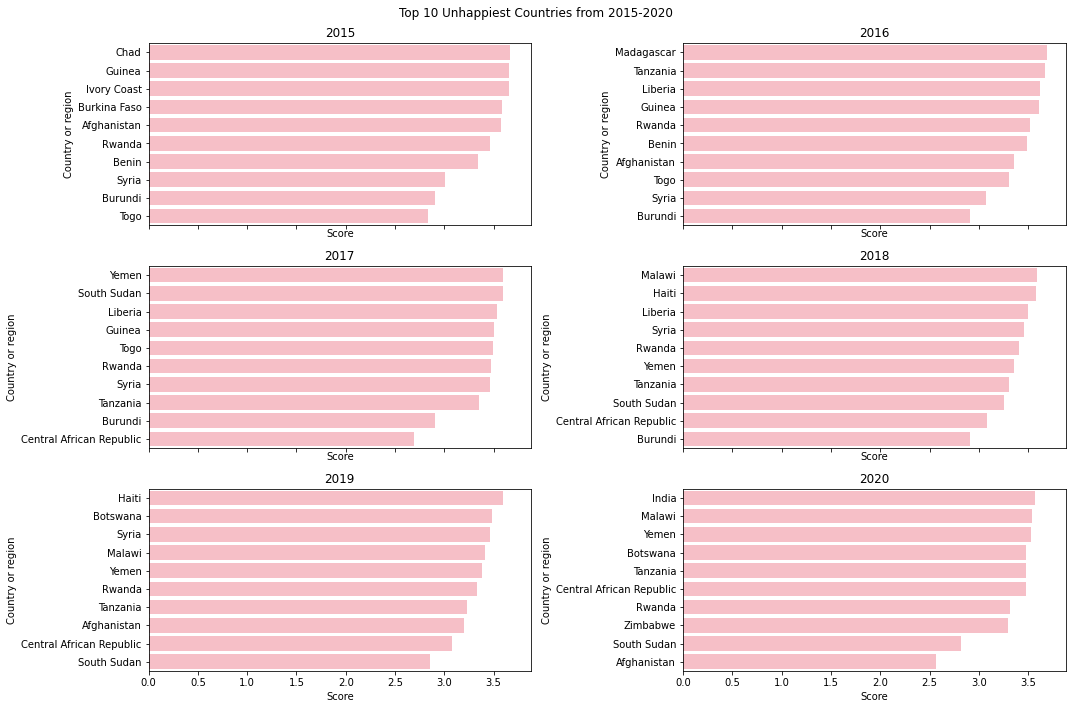

In [146]:
# some of the happiest countries over the year 
fig, axes = plt.subplots(3,2, figsize=(15,10), sharex=True)

df_top = df2015.iloc[-10:, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#FFB6C1', ax=axes[0, 0])
axes[0,0].set_title('2015')

df_top = df2016.iloc[-10:, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#FFB6C1', ax=axes[0, 1])
axes[0, 1].set_title('2016')

df_top = df2017.iloc[-10:, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#FFB6C1', ax=axes[1, 0])
axes[1, 0].set_title('2017')

df_top = df2018.iloc[-10:, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#FFB6C1', ax=axes[1, 1])
axes[1, 1].set_title('2018')

df_top = df2019.iloc[-10:, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#FFB6C1', ax=axes[2, 0])
axes[2, 0].set_title('2019')

df_top = df2020.iloc[-10:, :]
sns.barplot(x=df_top['Score'], y=df_top['Country or region'], orient='h', color='#FFB6C1', ax=axes[2, 1])
axes[2, 1].set_title('2020')

fig.suptitle('Top 10 Unhappiest Countries from 2015-2020')
fig.tight_layout()
plt.show()

# african countries are typically on the lower scale
unhappiest_countries = ['Afghanistan', 'Yemen', 'India', 'Syria', 'Central African Republic']

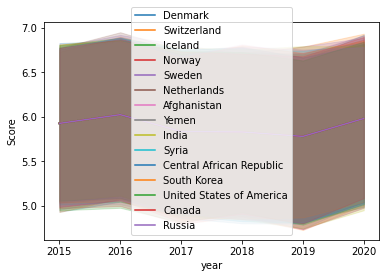

In [160]:
# line plots! 
avg_countries = ['South Korea', 'United States of America', 'Canada', 'Russia']
countries = happiest_countries + unhappiest_countries + avg_countries
df_i=df[df['Country or region'].isin(countries)]

for c in countries:
    sns.lineplot(x=df_i['year'], y=df_i['Score'], label=c)

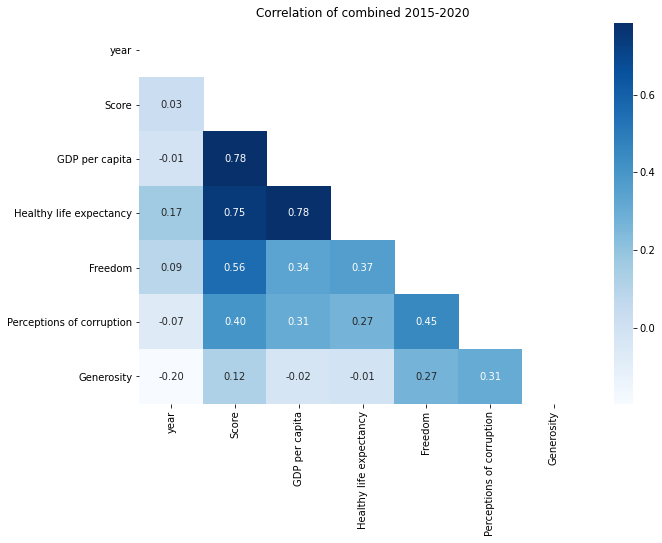

In [124]:
plt.figure(figsize=(10,7))
col = df.corr()
mask = np.triu(np.ones_like(col, dtype=bool))
sns.heatmap(col,annot=True,fmt='.2f',cmap="Blues", mask=mask);
plt.title("Correlation of combined 2015-2020")
plt.show()